# Measurement

Measurement is an art of extracting one classical bit of data from a single qubit state. It destroys entanglement and phase decoherence.

To obtain the information about a qubit's state, one has to measure it onto a classical bit. In qiskit, the measurements are performed in computational basis, pauli-Z basis. This can be done by "measure" function.

QuantumCircuit(a,b) where "a" corresponds to qubits and "b" corresponds to classical bits.

measure([a,b],[c,d]) : measuring qubit "a" into classical bit "c", similarly for "b" into "d".

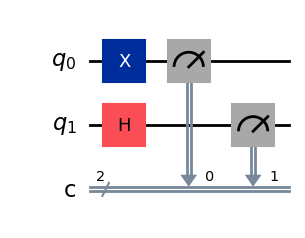

In [21]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2,2)
qc.x(0)
qc.h(1)

qc.measure([0,1],[0,1])
qc.draw("mpl")

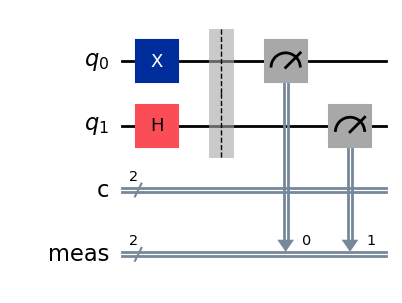

In [22]:
#To measure all qubits, one can use "measure_all"
qc = QuantumCircuit(2,2)
qc.x(0)
qc.h(1)

qc.measure_all()
qc.draw("mpl")

There are some more ways to do measurement.

# Advanced Measurements

There are some other measurements that can be done on wavefunction or quantum states. Some of those quantities are Fidelity, purity, entropy, entanglement, and so on. 

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


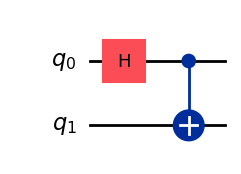

In [7]:
#create a Bell state and convert to a statevector or quantum state
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qstate = Statevector(qc)

print(qstate)

qc.draw("mpl")

In above expression, only first and last coefficients are zero. And for two qubits, the total states are |00>, |01>, |10> and |11>. The above expression for statevector tells that it creates a bell state of form 1/sqrt(2) (|00> + |11>). 

In [24]:
from qiskit.quantum_info import purity,entropy,entanglement_of_formation,mutual_information

#Purity
print(f"Purity of Bell state: {purity(qstate)}")

Purity of Bell state: 0.9999999999999996


As Bell state is a pure state, we get a value almost 1. 

In [32]:
#Entropy
print(f"Entropy of bell state: {entropy(qstate, base =2)}")

Entropy of bell state: 0


In [34]:
#Entanglement
print(f"Entanglement of bell state: {entanglement_of_formation(qstate)}")

Entanglement of bell state: 1.0


As Bell state is a maximally entangled state, we get entanglement to 1.

In [35]:
#mutual information
print(f"Mutual information present in bell state: {mutual_information(qstate, base =2)}")

Mutual information present in bell state: 2.0


In [36]:
#Creating density matrix from statevector: dmatrix = |qstate><qstate|
from qiskit.quantum_info import DensityMatrix

dmatrix = DensityMatrix(qstate)
dmatrix

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


Fidelity(F): It measures the similarity between two quantum states. 

F = 1, states are identical

F = 0, states are completely orthogonal

There are different fidelity measurements in qiskit. Some are related to different noise quantum channels.

In [37]:
#Creating two quantum states to evaluate fidelity
from qiskit.quantum_info import state_fidelity

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)
psi = Statevector.from_instruction(qc1)

qc2 = QuantumCircuit(2)
qc2.h(1)
qc2.cx(1, 0)
phi = Statevector.from_instruction(qc2)

f = state_fidelity(psi, phi)
print(f"Fidelity between Bell-like states: {f}")


Fidelity between Bell-like states: 0.9999999999999996
